In [45]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
datos = pd.read_csv('../data/precios_casas.csv')

# **Manos a la obra: mapa de calor de correlación**

**¿Vamos a practicar el concepto de correlación?**

Durante la clase, exploramos la correlación entre cada característica de la casa y su precio; sin embargo, el coeficiente de correlación también se puede aplicar a cualquier par de variables.

En esta actividad, analiza la correlación de todas las variables a través de una forma visual, ejecutando el código a continuación en una celda de tu notebook.

In [47]:
datos

,Id,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente,precio_de_venta
0,1,79.5224,1,79.3366,2,548,0,1027905.00
1,2,117.2398,0,0.0000,2,460,0,894795.00
2,3,85.4680,1,80.4514,2,608,0,1101855.00
3,4,89.2769,1,70.2324,1,642,0,690200.00
4,5,106.3705,1,97.8237,2,836,0,1232500.00
...,...,...,...,...,...,...,...,...
1433,1456,88.5337,1,64.4726,2,460,0,862750.00
1434,1457,192.5817,0,0.0000,2,500,0,1035300.00
1435,1458,110.3652,1,107.0208,2,252,0,1313845.00
1436,1459,100.1462,0,0.0000,1,240,0,700676.25


In [48]:
datos.drop('Id', axis=1, inplace=True)

In [49]:
datos.columns

Index(['area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente', 'precio_de_venta'],
      dtype='object')

In [50]:
# Correlación
corr = datos.corr()

In [51]:
# ¿Qué factores están más correlacionados?

# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

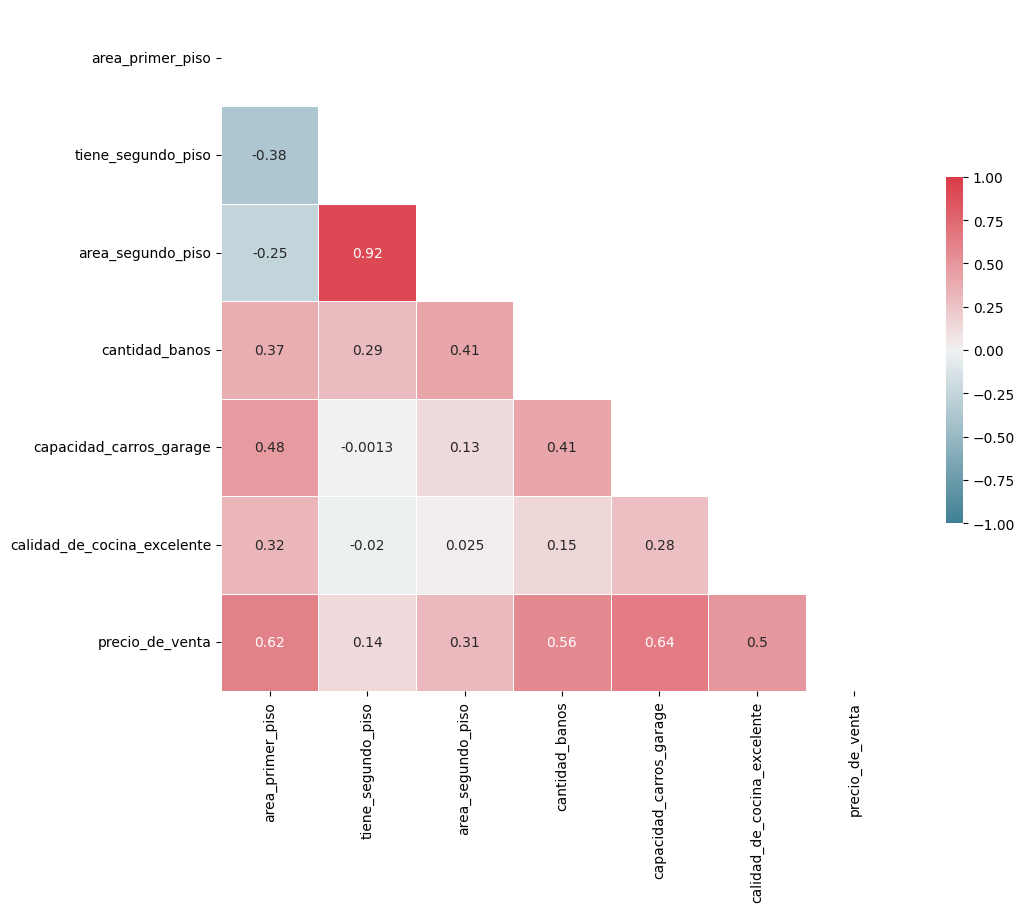

In [52]:
# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()

**Consejo:** Presta atención a los puntos a continuación para un análisis completo:

- **Intensidad:** se refiere a la fuerza de la relación entre las variables medidas. Puede variar de -1 a +1, donde -1 indica una correlación perfectamente negativa, +1 indica una correlación perfectamente positiva y 0 indica ausencia de correlación lineal.
- **Dirección:** se refiere a la naturaleza de la relación entre las variables medidas. Una correlación positiva indica que las variables aumentan o disminuyen juntas, mientras que una correlación negativa indica que una variable aumenta mientras la otra disminuye, o viceversa.

**Ejemplo:**

El coeficiente de correlación lineal entre el **área del primer piso** y el **precio de venta** es de **0.62**, indicando una **correlación positiva moderadamente fuerte** (intensidad). En general, a medida que el área del primer piso de una casa aumenta, el precio de venta también tiende a aumentar (dirección).

Enumeramos algunos coeficientes para analizar:

- La correlación entre la **capacidad de coches en la garaje** y el **área del primer piso** es 0.48 moderadamente positiva, indicando que, en general, a medida que la capacidad de coches en la garaje aumenta, el área del primer piso de la casa tiende a aumentar también.
- Entre **garaje para coches** y **cantidad de baños** es moderadamente positiva (0.409281), indicando que, en general, a medida que la capacidad de la garaje aumenta, el número de baños también tiende a aumentar. Esto sugiere una posible asociación entre el espacio para estacionamiento de vehículos y el tamaño de la residencia.
- Cuando miramos la correlación entre el **área del primer piso** y el **área del segundo piso**, verificamos que es débil y negativa (-0.25). Esto sugiere que, en general, cuando el área del primer piso de una casa aumenta, el área del segundo piso tiende a disminuir un poco, y viceversa. Esta relación indica una posible compensación entre las áreas de los dos pisos, pero no es una relación muy fuerte y puede variar entre diferentes propiedades.

**Observación:** Es importante notar que la **correlación no implica causalidad**; es decir, no podemos afirmar que el aumento en el precio de venta es causado específicamente por el aumento en el área del primer piso solo con el uso de la correlación, sino que estos factores están relacionados entre sí.

# **Formatos de los gráficos de dispersión**

Sara está analizando datos y decidió construir varios gráficos de dispersión para comprender la relación entre las variables de su conjunto de datos. Ahora, vamos a ayudar a Sara a entender lo que representa cada gráfico.

Con base en los gráficos de dispersión realizados por Sara, ¿cuál de los siguientes análisis es correcto?

![imagen](http://cdn3.gnarususercontent.com.br/2145-data-science-probando-relaciones-con-regresion-lineal/Imagenes/7.ActividadB.webp.crdownload.webp)

**Los puntos están esparcidos aleatoriamente, sin mostrar ninguna tendencia clara entre las variables.**

El gráfico de dispersión es una excelente herramienta para identificar tendencias entre variables, sin embargo, también es posible identificar la ausencia de correlación entre las variables, es decir, cuando no tienen una relación lineal clara entre sí, presentando, de esta forma, puntos dispuestos de manera aleatoria.

# **Separando el conjunto de datos**

Diana está comenzando sus estudios en ciencia de datos y se dio cuenta de que separar conjuntos de datos en entrenamiento y prueba es una práctica recurrente en machine learning.

Con base en esto, surge la pregunta: ¿Cuál es la principal razón para dividir un conjunto de datos en conjuntos de entrenamiento y prueba al construir modelos de machine learning? Elige una alternativa.

**Para evaluar el desempeño del modelo en datos no vistos.**

> *Dividir el conjunto de datos en conjuntos de entrenamiento y prueba es una práctica esencial en machine learning para evaluar la capacidad de generalización del modelo. El conjunto de entrenamiento se usa para entrenar el modelo, mientras que el conjunto de prueba se mantiene separado y se usa para evaluar el desempeño del modelo en datos no vistos, simulando cómo se comportaría el modelo al ser aplicado en situaciones reales.*

# **Manos a la obra: análisis y selección de modelos de regresión lineal**

Como persona Científica de Datos, estás a cargo del análisis del problema de fijación de precios de habitaciones de hoteles, utilizando el conjunto de datos proporcionado. Para ello, dispones de este dataset.

En esta actividad, tu tarea consiste en llevar a cabo las siguientes etapas:
1. análisis inicial con el PairPlot de Seaborn;
2. construir modelos de regresión lineal; y
3. realizar la comparación de estos modelos.

Dedica tiempo a las actividades y desarrolla tus habilidades a través de la aplicación de tus conocimientos adquiridos a lo largo del curso.

In [53]:
import pandas as pd

In [54]:
df = pd.read_csv('../data/hoteis.csv')
df.head()

,Estrelas,ProximidadeTurismo,Capacidade,Preco
0,5,9.301565,3,506.275452
1,1,1.785891,1,246.363458
2,4,15.504293,3,325.873550
3,4,4.173188,3,521.343284
4,4,9.443685,1,252.587087


## **Paso 1: Análisis con PairPlot**

In [55]:
import seaborn as sns

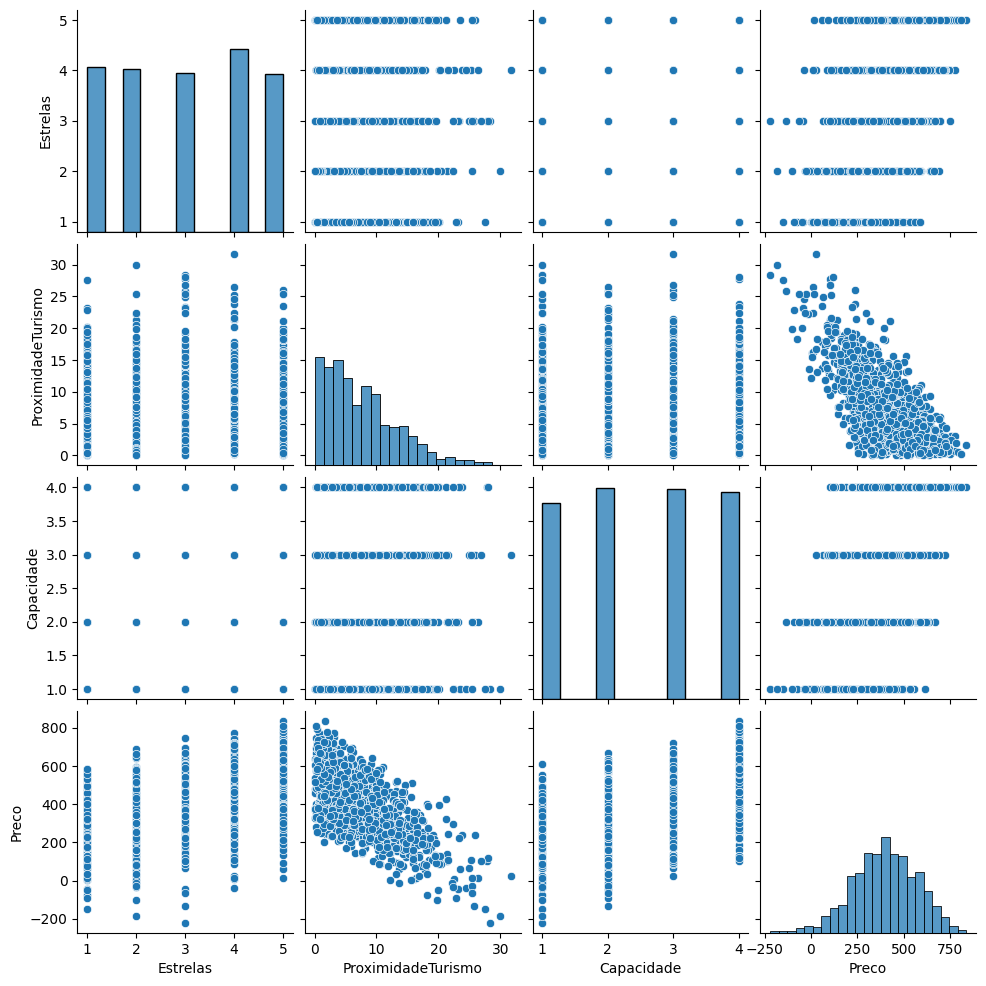

In [56]:
sns.pairplot(df);

## **Paso 2: Construcción de modelos de regresión lineal**

In [57]:
import statsmodels.api as sm

In [58]:
# Modelo 1: Utilizando únicamente 'Estrellas'
X1 = df[['Estrelas']]
X1 = sm.add_constant(X1)  # Sumando la constante
y = df['Preco']
modelo_1 = sm.OLS(y, X1).fit()

# Modelo 2: Uso de 'Estrellas' y 'Turismo de Proximidad'
X2 = df[['Estrelas', 'ProximidadeTurismo']]
X2 = sm.add_constant(X2)
modelo_2 = sm.OLS(y, X2).fit()

# Modelo 3: Utilizando 'Estrellas', 'Turismo de Proximidad' y 'Capacidad'
X3 = df[['Estrelas', 'ProximidadeTurismo', 'Capacidade']]
X3 = sm.add_constant(X3)
modelo_3 = sm.OLS(y, X3).fit()

## **Paso 3: Comparación de modelos**

In [59]:
print("Modelo 1 - Apenas 'Estrelas':")
print(modelo_1.summary())
print("\nModelo 2 - 'Estrelas' e 'ProximidadeTurismo':")
print(modelo_2.summary())
print("\nModelo 3 - 'Estrelas', 'ProximidadeTurismo' e 'Capacidade':")
print(modelo_3.summary())

Modelo 1 - Apenas 'Estrelas':
                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     191.3
Date:                Mon, 04 Aug 2025   Prob (F-statistic):           6.09e-40
Time:                        19:38:02   Log-Likelihood:                -6476.7
No. Observations:                1000   AIC:                         1.296e+04
Df Residuals:                     998   BIC:                         1.297e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        249.3517 

# **Manos a la obra: estimando el valor de una casa**

Recibiste una solicitud para estimar el precio de una casa con las siguientes características:

- 1 baño
- Área 98m²
- No tiene segundo piso
- Calidad de la cocina excelente

![img1](http://cdn3.gnarususercontent.com.br/2145-data-science-probando-relaciones-con-regresion-lineal/Imagenes/7.HagaLoQueHicimos.png)

Tu tarea es utilizar el modelo de regresión entrenado durante el curso para obtener el precio de la casa con estas características. Por lo tanto, crea un DataFrame con esta información y haz la predicción del valor del inmueble.

Para realizar la tasación de una casa con estas características, primero necesitamos crear un DataFrame con cada una de las informaciones, almacenando en una variable `nuevo_inmueble`. Este DataFrame necesita la información de constante 1 para que se pueda hacer la predicción con `statsmodels`:

In [60]:
nuevo_inmueble = pd.DataFrame({'const':[1],
                               'area_primer_piso':[98],
                               'tiene_segundo_piso': [0],
                               'cantidad_banos': [1],
                               'calidad_de_la_cocina_excelente': [1]
                               })

Si deseamos utilizar un modelo más simplificado, podemos hacer la predicción solo con la información del área de la casa, a partir del `modelo_0`:

In [61]:
# import train_test_split
from sklearn.model_selection import train_test_split

y = datos['precio_de_venta']
X = datos.drop(columns='precio_de_venta')

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=230) # garantizar la reproductibilidad de la segregación de los datos

In [62]:
#Datos de entrenamiento para usar la fórmula
df_train = pd.DataFrame(X_train)
df_train['precio_de_venta'] = y_train

In [63]:
# import ols
from statsmodels.formula.api import ols

In [64]:
modelo_0 = ols('precio_de_venta ~ area_primer_piso',data=df_train).fit()

In [65]:
modelo_0.predict(nuevo_inmueble['area_primer_piso'])

0    818686.169194
dtype: float64

In [66]:
# visualizando los parámetros
modelo_0.params

Intercept           152909.288334
area_primer_piso      6793.641641
dtype: float64

In [67]:
# El resumen del modelo
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:        precio_de_venta   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Mon, 04 Aug 2025   Prob (F-statistic):          2.22e-105
Time:                        19:38:02   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.529e+05   3.07e+04  

Pero si queremos un modelo que tenga en cuenta todas las características disponibles, podemos usar el `modelo_3`:

In [68]:
# importando la api de statsmodels
import statsmodels.api as sm

In [69]:
# Añadiendo una constante
X_train = sm.add_constant(X_train)
X_train.head()

,const,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente
1303,1.0,65.7732,0,0.0000,1,0,0
326,1.0,55.3684,1,55.3684,1,189,0
386,1.0,74.6916,1,107.4853,2,560,0
615,1.0,103.6764,0,0.0000,1,440,0
236,1.0,94.2006,1,67.8170,2,457,0


In [70]:
# Modelo sin la información del garage
# Modelo sin el área del segundo piso
modelo_3 = sm.OLS(y_train,X_train[[
    'const', 'area_primer_piso',
    'tiene_segundo_piso', 
    'cantidad_banos', 
    'calidad_de_cocina_excelente'
]]).fit()

In [71]:
modelo_3.predict(nuevo_inmueble)[0]

np.float64(1063173.8519646416)

In [72]:
# El resumen del modelo
print(modelo_3.summary())

                            OLS Regression Results                            
Dep. Variable:        precio_de_venta   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     467.1
Date:                Mon, 04 Aug 2025   Prob (F-statistic):          4.15e-227
Time:                        19:38:02   Log-Likelihood:                -13790.
No. Observations:                1006   AIC:                         2.759e+04
Df Residuals:                    1001   BIC:                         2.762e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

A partir de esto, es posible obtener el valor de venta del inmueble utilizando los modelos que fueron construidos durante el curso.

# **Manos a la obra: ajustando un modelo para la planta**

En esta actividad, vamos a aplicar los conceptos de multicolinealidad y homocedasticidad en un contexto diferente: el sector de energía. Utilizaremos este [dataset](https://drive.google.com/file/d/1AhIO_HBe7ZR9FGODzrj-_vvXBZiJ1sIC/view?usp=sharing) de una planta de energía para explorar cómo estos conceptos pueden afectar nuestros modelos de regresión. ¡Vamos!

Tu tarea implica llevar a cabo las siguientes etapas:

**Primera etapa:** Verifica la multicolinealidad utilizando el concepto de VIF. Si hay indicios de multicolinealidad entre las variables, intenta pensar en qué medidas se pueden tomar. Para ello, deberás construir un modelo de regresión lineal asumiendo que la columna PE es la variable y.

**Segunda etapa:** Realiza un análisis de residuos e identifica si hay o no heterocedasticidad en los datos.

Dedica tiempo a las actividades y desarrolla tus habilidades a través de la aplicación de tus conocimientos adquiridos a lo largo del curso.

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [74]:
df = pd.read_csv('../data/usina.csv')
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [75]:
y = df['PE']
X = df.drop(columns=['PE'])

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=230)

In [77]:
import statsmodels.api as sm

In [78]:
#adicionando o constante
X_train= sm.add_constant(X_train)

In [79]:
modelo = sm.OLS(y_train,X_train).fit()

In [80]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.191e+04
Date:                Mon, 04 Aug 2025   Prob (F-statistic):               0.00
Time:                        19:38:02   Log-Likelihood:                -19662.
No. Observations:                6697   AIC:                         3.933e+04
Df Residuals:                    6692   BIC:                         3.937e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        446.1042     11.769     37.905      0.000     423.033     469.175
AT            -1.9607      0.018   -106.991      0.000      -1.997      -1.925
V             -0.2413      0.009    -27.670      0.000      -0.258      -0.224
AP             0.0702      0.011      6.152      0.000       0.048       0.093
RH            -0.1537      0.005    -30.823      0.000      -0.163      -0.144
==============================================================================
Omnibus:                      481.758   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1740.892
Skew:                          -0.300   Prob(JB):                         0.00
Kurtosis:                       5.424   Cond. No.                     2.15e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## **Multicolinealidad**

In [81]:
# importar el VIF de statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [82]:
explicativas = ['const', 'AT', 'V', 'AP', 'RH']

In [83]:
# VIF 1
vif_1 = pd.DataFrame()
vif_1['variables'] = explicativas

In [84]:
vif_1['vif'] = [vif(X_train[explicativas],i) for i in range(len(explicativas))]
vif_1

,variables,vif
0,const,44603.788615
1,AT,6.034363
2,V,3.954998
3,AP,1.468530
4,RH,1.717508


Los resultados obtenidos se refieren al cálculo del Factor de Inflación de la Varianza (FIV), una métrica utilizada para cuantificar el grado de multicolinealidad en un modelo de regresión lineal. El FIV indica cuánto aumenta la varianza de un coeficiente de regresión debido a la multicolinealidad.

A continuación, se presenta una interpretación de los valores del FIV obtenidos para cada variable:

1. **const**: Este valor grande (44603.788615) para la constante (intersección) generalmente no se interpreta en el contexto de multicolinealidad, ya que es simplemente un valor que ajusta la media de la respuesta cuando todas las variables predictoras son iguales a cero.
2. **AT (Temperatura Ambiente)**: Un VIF de aproximadamente 6,03 indica una multicolinealidad moderada. Un VIF superior a 5 puede ser motivo de preocupación, ya que sugiere que esta variable tiene una correlación lineal moderada con las demás variables independientes del modelo.
3. **V (Velocidad del Viento)**: Con un VIF de aproximadamente 3,95, indica una multicolinealidad de baja a moderada. Esto sugiere que existe cierta correlación con otras variables predictoras, pero no es extremadamente alta.
4. **AP (Presión atmosférica)**: El VIF de aproximadamente 1,47 sugiere que hay poca multicolinealidad relacionada con esta variable, lo que indica que tiene una relación lineal relativamente baja con las otras variables predictoras.
5. **RH (humedad relativa)**: un VIF de aproximadamente 1,72 también indica una multicolinealidad baja, lo que demuestra que esta variable tiene una pequeña correlación lineal con las demás variables del modelo.

**Interpretación general**:
- Valores de VIF inferiores a 5 generalmente indican una multicolinealidad baja, como ocurre con AP, V y RH.
- Un VIF entre 5 y 10 (como se observa en AT) sugiere una multicolinealidad moderada, lo que puede ser motivo de preocupación o no, según el contexto específico del análisis.
- Valores de VIF superiores a 10 indicarían una multicolinealidad alta, lo cual no se observó en este caso, excepto para la constante, que, como se mencionó, generalmente no se considera en el análisis de multicolinealidad.

En resumen, los resultados indican que, a excepción de la temperatura ambiente (TA), las demás variables presentan un nivel aceptable de multicolinealidad en el modelo. La temperatura ambiente presenta un nivel moderado de multicolinealidad y podría requerir mayor investigación o una posible reformulación del modelo.